In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [321]:
df = pd.read_csv('./data/US_Accidents_March23_sampled_500k.csv')
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Highway 19,Zachary,East Baton Rouge,LA,70791-4610,US,US/Central,KBTR,2019-06-12 09:53:00,77.0,77.0,62.0,29.92,10.0,NW,5.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL...,Forest Ridge Dr,Sterling,Loudoun,VA,20164-2813,US,US/Eastern,KIAD,2022-12-03 23:52:00,45.0,43.0,48.0,29.91,10.0,W,5.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,Accident on W Central Ave from Floradale Ave t...,Floradale Ave,Lompoc,Santa Barbara,CA,93436,US,US/Pacific,KLPC,2022-08-20 12:56:00,68.0,68.0,73.0,29.79,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,Incident on I-90 EB near REST AREA Drive with ...,14th St NW,Austin,Mower,MN,55912,US,US/Central,KAUM,2022-02-21 17:35:00,27.0,15.0,86.0,28.49,10.0,ENE,15.0,0.00,Wintry Mix,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,River Blvd,Bakersfield,Kern,CA,93305-2649,US,US/Pacific,KBFL,2020-12-04 01:54:00,42.0,42.0,34.0,29.77,10.0,CALM,0.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,Stationary traffic on OR-47 from NW Martin Rd ...,Quince St,Forest Grove,Washington,OR,97116-2174,US,US/Pacific,KHIO,2021-12-15 07:14:00,40.0,32.0,77.0,29.55,10.0,SSE,15.0,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,Incident on MILITARY TRL near WESTGATE AVE Dri...,N Military Trl,West Palm Beach,Palm Beach,FL,33409-4712,US,US/Eastern,KPBI,2021-12-19 16:53:00,78.0,78.0,87.0,29.94,10.0,SSE,13.0,0.01,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,Crash on the right shoulder on E SR-69 Northbo...,E AZ-69,Dewey,Yavapai,AZ,86327,US,US/Mountain,KPRC,2022-04-13 19:53:00,52.0,52.0,12.0,24.94,10.0,WSW,12.0,0.00,Fair,False,False,True,True,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,At US-340/S Stuart Ave - Serious accident.,W Spo

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [72]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

df['Time_Duration(min)']=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     500000 non-null  object        
 1   Source                 500000 non-null  object        
 2   Severity               500000 non-null  int64         
 3   Start_Time             451837 non-null  datetime64[ns]
 4   End_Time               451837 non-null  datetime64[ns]
 5   Start_Lat              500000 non-null  float64       
 6   Start_Lng              500000 non-null  float64       
 7   End_Lat                279623 non-null  float64       
 8   End_Lng                279623 non-null  float64       
 9   Distance(mi)           500000 non-null  float64       
 10  Description            499999 non-null  object        
 11  Street                 499309 non-null  object        
 12  City                   499981 non-null  obje

In [73]:
df.dropna(subset=['Time_Duration(min)'],axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451837 entries, 0 to 499999
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     451837 non-null  object        
 1   Source                 451837 non-null  object        
 2   Severity               451837 non-null  int64         
 3   Start_Time             451837 non-null  datetime64[ns]
 4   End_Time               451837 non-null  datetime64[ns]
 5   Start_Lat              451837 non-null  float64       
 6   Start_Lng              451837 non-null  float64       
 7   End_Lat                231460 non-null  float64       
 8   End_Lng                231460 non-null  float64       
 9   Distance(mi)           451837 non-null  float64       
 10  Description            451836 non-null  object        
 11  Street                 451288 non-null  object        
 12  City                   451822 non-null  object   

In [74]:
median = df['Time_Duration(min)'].median()
std = df['Time_Duration(min)'].std()
outliers = (df['Time_Duration(min)'] - median).abs() > std*3
df[outliers] = np.nan
df['Time_Duration(min)'].fillna(median, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451837 entries, 0 to 499999
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     451559 non-null  object        
 1   Source                 451559 non-null  object        
 2   Severity               451559 non-null  float64       
 3   Start_Time             451559 non-null  datetime64[ns]
 4   End_Time               451559 non-null  datetime64[ns]
 5   Start_Lat              451559 non-null  float64       
 6   Start_Lng              451559 non-null  float64       
 7   End_Lat                231184 non-null  float64       
 8   End_Lng                231184 non-null  float64       
 9   Distance(mi)           451559 non-null  float64       
 10  Description            451558 non-null  object        
 11  Street                 451010 non-null  object        
 12  City                   451544 non-null  object   

In [75]:
print(f"Максимальное время устранения аварии: {round(df['Time_Duration(min)'].max())} минут или {round(df['Time_Duration(min)'].max()/60)} часов или {round(df['Time_Duration(min)'].max()/60/24)} дней; Минимульное время устранение аварии: {df['Time_Duration(min)'].min()} минут.")

Максимальное время устранения аварии: 37439 минут или 624 часов или 26 дней; Минимульное время устранение аварии: 2.0 минут.


In [76]:
feature_lst=['Source','Severity','Start_Lng','Start_Lat','Distance(mi)','City','County','State','Time_Duration(min)']

In [77]:
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451837 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Source              451559 non-null  object 
 1   Severity            451559 non-null  float64
 2   Start_Lng           451559 non-null  float64
 3   Start_Lat           451559 non-null  float64
 4   Distance(mi)        451559 non-null  float64
 5   City                451544 non-null  object 
 6   County              451559 non-null  object 
 7   State               451559 non-null  object 
 8   Time_Duration(min)  451837 non-null  float64
dtypes: float64(5), object(4)
memory usage: 34.5+ MB


In [78]:
df_sel.isnull().mean()

Source                0.000615
Severity              0.000615
Start_Lng             0.000615
Start_Lat             0.000615
Distance(mi)          0.000615
City                  0.000648
County                0.000615
State                 0.000615
Time_Duration(min)    0.000000
dtype: float64

In [79]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(451544, 9)

In [80]:
state='PA'

df_state=df_sel.loc[df_sel.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17043 entries, 58 to 499960
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              17043 non-null  object 
 1   Severity            17043 non-null  float64
 2   Start_Lng           17043 non-null  float64
 3   Start_Lat           17043 non-null  float64
 4   Distance(mi)        17043 non-null  float64
 5   City                17043 non-null  object 
 6   County              17043 non-null  object 
 7   Time_Duration(min)  17043 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.2+ MB


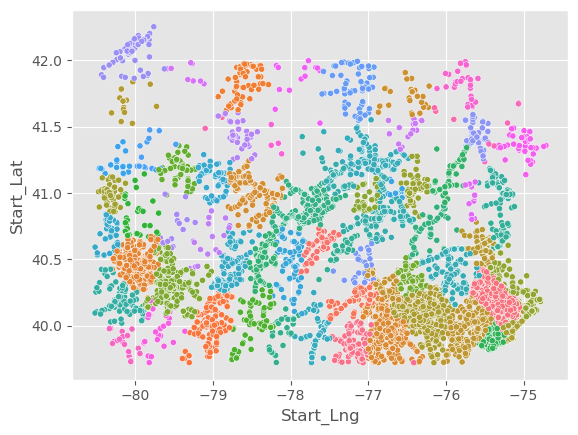

In [81]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

In [82]:
county='Montgomery'
df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4060 entries, 85 to 499918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              4060 non-null   object 
 1   Severity            4060 non-null   float64
 2   Start_Lng           4060 non-null   float64
 3   Start_Lat           4060 non-null   float64
 4   Distance(mi)        4060 non-null   float64
 5   City                4060 non-null   object 
 6   Time_Duration(min)  4060 non-null   float64
dtypes: float64(5), object(2)
memory usage: 253.8+ KB


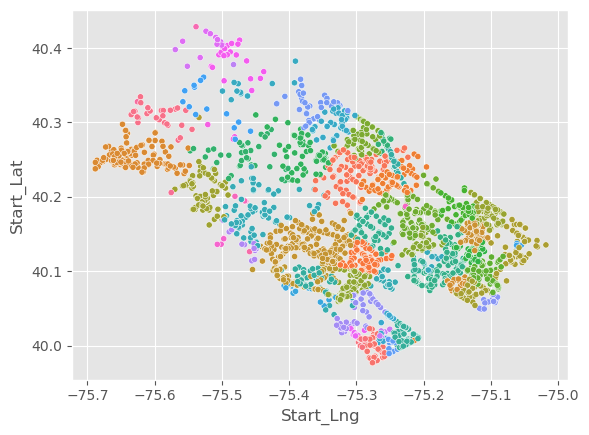

In [83]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_county, hue='City', legend=False, s=20)
plt.show()

In [84]:
df_county_dummy = pd.get_dummies(df_county,drop_first=True)
df_county_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4060 entries, 85 to 499918
Data columns (total 74 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Severity                4060 non-null   float64
 1   Start_Lng               4060 non-null   float64
 2   Start_Lat               4060 non-null   float64
 3   Distance(mi)            4060 non-null   float64
 4   Time_Duration(min)      4060 non-null   float64
 5   Source_Source2          4060 non-null   bool   
 6   Source_Source3          4060 non-null   bool   
 7   City_Ambler             4060 non-null   bool   
 8   City_Ardmore            4060 non-null   bool   
 9   City_Bala Cynwyd        4060 non-null   bool   
 10  City_Barto              4060 non-null   bool   
 11  City_Blue Bell          4060 non-null   bool   
 12  City_Boyertown          4060 non-null   bool   
 13  City_Bridgeport         4060 non-null   bool   
 14  City_Bryn Athyn         4060 non-null   bo

In [122]:
df=df_county_dummy

target='Severity'

y = df[target]
X = df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [123]:
algo_lst = {"Logistic Regression": 0, "Random Forest": 0}

In [127]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

algo_lst["Logistic Regression"] = accuracy_score(y_test, y_pred)

print(f"[Logistic regression algorithm] accuracy_score: {format(algo_lst['Logistic Regression'])}.")

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.93      0.99      0.96       746
         3.0       0.56      0.26      0.36        53
         4.0       0.00      0.00      0.00         8

    accuracy                           0.92       812
   macro avg       0.37      0.31      0.33       812
weighted avg       0.89      0.92      0.90       812

[Logistic regression algorithm] accuracy_score: 0.9224137931034483.


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labe

In [128]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

algo_lst["Random Forest"] = accuracy_score(y_test, y_pred)

print(f"[Randon forest algorithm] accuracy_score: {algo_lst['Random Forest']}.")


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.96      0.98      0.97       746
         3.0       0.74      0.58      0.65        53
         4.0       0.00      0.00      0.00         8

    accuracy                           0.94       812
   macro avg       0.42      0.39      0.41       812
weighted avg       0.93      0.94      0.93       812

[Randon forest algorithm] accuracy_score: 0.9421182266009852.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


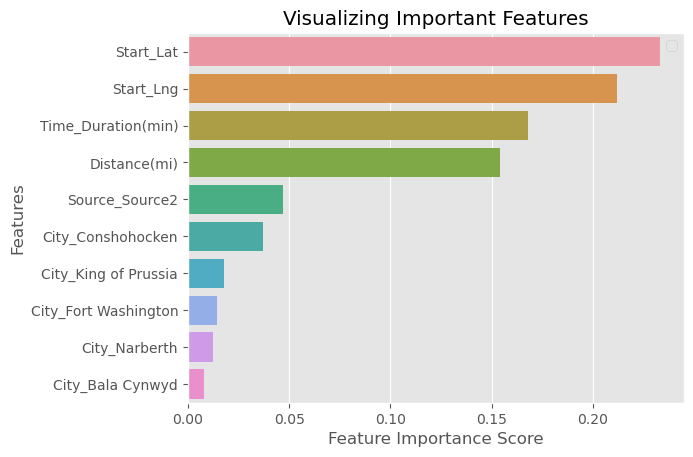

In [129]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [90]:
k=20
feature_imp.sort_values(ascending=False)[:k]

Start_Lat                0.226449
Start_Lng                0.221332
Time_Duration(min)       0.168866
Distance(mi)             0.157273
Source_Source2           0.045198
City_Conshohocken        0.032884
City_King of Prussia     0.018017
City_Fort Washington     0.013559
City_Narberth            0.011344
City_Gladwyne            0.010211
City_Bala Cynwyd         0.007984
City_Upper Merion        0.006493
City_Harleysville        0.005642
Source_Source3           0.005221
City_Plymouth Meeting    0.005176
City_Willow Grove        0.004115
City_Norristown          0.003999
City_Montgomeryville     0.003603
City_King Of Prussia     0.003308
City_Lansdale            0.003291
dtype: float64

In [91]:
sfm = SelectFromModel(clf, threshold=0.03)

sfm.fit(X_train, y_train)

feat_labels=X.columns

for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Start_Lng
Start_Lat
Distance(mi)
Time_Duration(min)
Source_Source2
City_Conshohocken


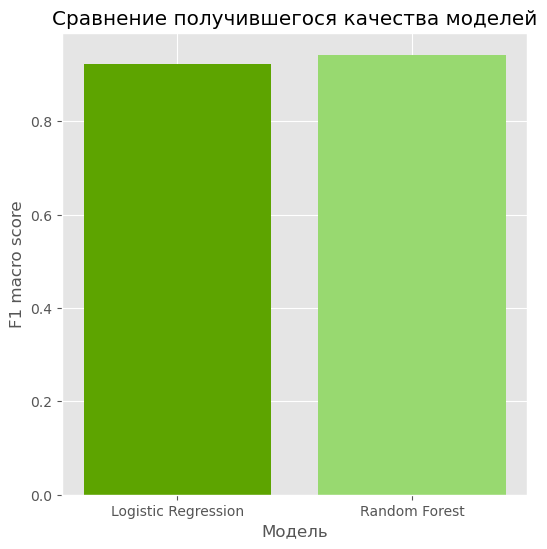

In [132]:
plt.figure(figsize=(6,6))
plt.bar(["Logistic Regression", "Random Forest"], [algo_lst["Logistic Regression"], algo_lst["Random Forest"]], color=["#5da400", "#98d970"])
plt.title('Сравнение получившегося качества моделей')
plt.xlabel('Модель')
plt.ylabel('F1 macro score')
plt.show()